In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

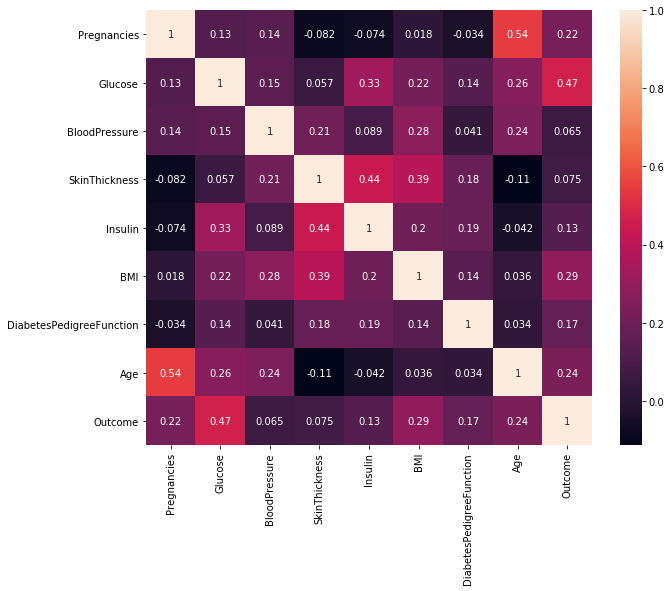

In [8]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [23]:
import scipy.cluster.hierarchy as sch
#ward minimises the WCSS
Z=sch.linkage(data,method='ward') # all the column values are included in x axis

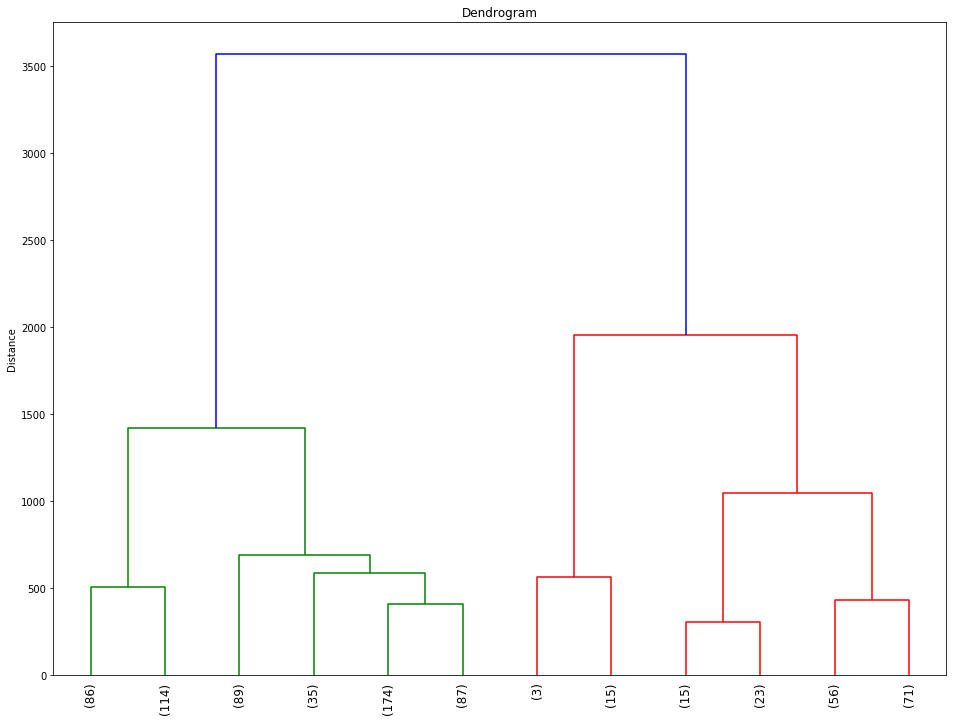

In [27]:
plt.figure(figsize=[16,12])
dend=sch.dendrogram(Z,orientation="top",truncate_mode="lastp",p=12,leaf_rotation=90)
plt.title("Dendrogram")
#plt.xlabel("Annual Income (k$)")
plt.ylabel("Distance")# distance of each point from another in each tree
plt.show()

In [11]:
from sklearn.cluster import KMeans


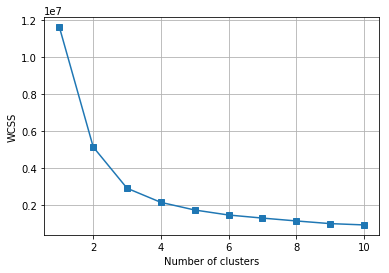

In [12]:
ks=range(1,11)
inertias=[]
for i in ks:
    km_mod=KMeans(n_clusters=i,random_state=42)
    km_mod.fit(data)
    inertias.append(km_mod.inertia_)
plt.plot(ks,inertias,'-s')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()     

In [13]:
km_mod=KMeans(n_clusters=4,random_state=42)


In [14]:
km_mod.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [15]:
labels=km_mod.predict(data)
labels

array([2, 2, 2, 0, 1, 2, 0, 2, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 0, 0, 1, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 3,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2,
       3, 2, 2, 1, 0, 2, 2, 2, 3, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 1, 1, 2, 2, 3, 3, 2, 2, 2, 0, 2, 1, 2, 2, 2, 3, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0,
       3, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2,

In [16]:
centriod=km_mod.cluster_centers_
centriod

array([[3.25581395e+00, 1.14958140e+02, 6.99953488e+01, 2.84837209e+01,
        1.03190698e+02, 3.23460465e+01, 4.94530233e-01, 2.98232558e+01,
        2.51162791e-01],
       [3.61061947e+00, 1.40017699e+02, 7.30088496e+01, 3.12654867e+01,
        2.26371681e+02, 3.50300885e+01, 5.97477876e-01, 3.40796460e+01,
        5.22123894e-01],
       [4.23980815e+00, 1.16381295e+02, 6.75155875e+01, 1.28633094e+01,
        4.00479616e+00, 3.07964029e+01, 4.17800959e-01, 3.47889688e+01,
        3.40527578e-01],
       [3.34782609e+00, 1.64260870e+02, 7.04347826e+01, 3.26521739e+01,
        5.15217391e+02, 3.54521739e+01, 6.23434783e-01, 3.30000000e+01,
        5.65217391e-01]])

In [17]:
centriod_x=centriod[:,1]
centriod_y=centriod[:,4]

In [18]:
xs=data.iloc[:,1]
ys=data.iloc[:,4]

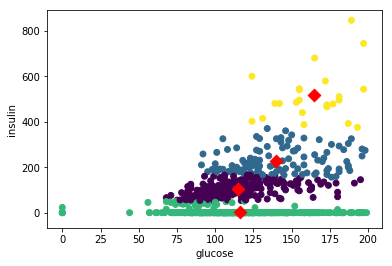

In [19]:
# cluster plot
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centriod_x,centriod_y,marker='D',c='r',s=80)
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.show()

In [20]:
centriod_x=centriod[:,3]
centriod_y=centriod[:,4]

In [21]:
xs=data.iloc[:,3]
ys=data.iloc[:,4]

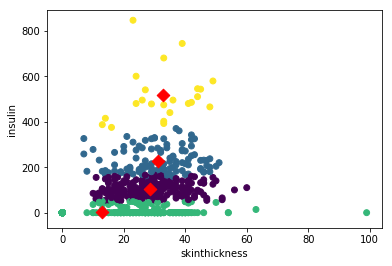

In [22]:
# cluster plot
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centriod_x,centriod_y,marker='D',c='r',s=80)
plt.xlabel("skinthickness")
plt.ylabel("insulin")
plt.show()